Erfan Panahi 810198369 \
# Intelligent Systems 

> Homework #1 - Part 2 ( **Non-Convex Optimization** )




In [ ]:
#@title Importing Packages
import numpy as np
import matplotlib.pyplot as plt
import random

>Part B

In [ ]:
#@title Optimization and find minimum value
X_init = np.matrix([1,3])
X_hat = opt_f(X_init,1000)
print('minimum of f(x1,x2) : f({},{}) = {}'.format(X_hat[0,0],X_hat[0,1],f(X_hat[0,0],X_hat[0,1])))

minimum of f(x1,x2) : f(0.13087466007249957,4.268357652256218) = -36.40349774185023


In [ ]:
#@title Comparing Different Initial Values 
x1 = np.arange(-5,5.5,0.5)
x2 = np.arange(0,10.5,0.5)
dis_to_min = np.zeros([21,21])
x1_close = []; x2_close = []; x1_far = []; x2_far = []; x1_farther = []; x2_farther = []
for i in range(21):
  for j in range(21):
    X_init = opt_f(np.matrix([x1[i],x2[j]]),100)
    dis_to_min = abs(f(X_init[0,0],X_init[0,1]) - (-36.4))
    if dis_to_min < 5:
      x1_close.append(x1[i]) 
      x2_close.append(x2[j]) 
    elif dis_to_min > 5 and dis_to_min < 50:
      x1_far.append(x1[i]) 
      x2_far.append(x2[j]) 
    else:
      x1_farther.append(x1[i]) 
      x2_farther.append(x2[j])

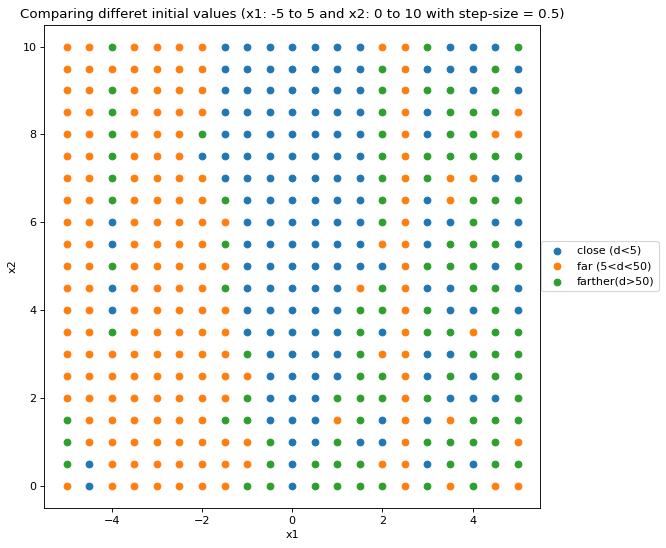

In [ ]:
#@title Plotting (Comparing Different Initial Value)
plt.figure(figsize=(8, 8), dpi=80)
plt.scatter(x1_close,x2_close,label = 'close (d<5)')
plt.scatter(x1_far,x2_far,label = 'far (5<d<50)')
plt.scatter(x1_farther,x2_farther,label = 'farther(d>50)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Comparing differet initial values (x1: -5 to 5 and x2: 0 to 10 with step-size = 0.5)')
plt.legend(loc='center right', bbox_to_anchor=(1.25, 0.5))
plt.show()

>Part C

In [ ]:
#@title Optimization using Genetic Algorithm
ITR = 100
Pop_size = 500
mutation_rate = 0.5
mutation_window = 3
mutation_select = 5
New_Pop, X_opt = Genetic(Pop_size, mutation_rate, mutation_select, mutation_window, ITR)
print('minimum of f(x1,x2) using Genetic Algorithm: f({},{}) = {}'.format(X_opt[0], X_opt[1], f(X_opt[0],X_opt[1])))

minimum of f(x1,x2) using Genetic Algorithm: f(0.11811023622047244,4.251968503937007) = -36.40034296457406


In [ ]:
#@title Functions

def opt_f(X_init,ITR):
  for itr in range(ITR):
    X_init = X_init - np.dot(np.linalg.inv(H_f(X_init[0,0],X_init[0,1])),grad_f(X_init[0,0],X_init[0,1]))
  return X_init

def f(x1,x2):
  F = 2*x1**2 + 2*x2**2 - 17*x2*np.cos(0.2*np.pi*x1) - x1*x2
  return F

def grad_f(x1,x2):
  G = np.array([4*x1+3.4*np.pi*x2*np.sin(0.2*np.pi*x1)-x2 , 4*x2-17*np.cos(0.2*np.pi*x1)-x1])
  return G
  
def H_f(x1,x2):
  H = np.matrix([[4+0.68*x2*np.pi**2*np.cos(0.2*np.pi*x1),3.4*np.pi*np.sin(0.2*np.pi*x1)-1],[3.4*np.pi*np.sin(0.2*np.pi*x1)-1,4]]) 
  return H

In [ ]:
#@title Functions (Part D - Genetic Algorithm)
def Genetic(Pop_size, mutation_rate, mutation_select, mutation_window, ITR):
  New_Pop, L = init_Pop([-15,15], [-15,15], Pop_size, 8)
  x_L = 30; 
  BtoD_par = x_L/(L-1); DtoB_par = (L-1)/x_L
  for itr in range(ITR):
    Old_Pop = New_Pop
    # Selection
    New_Pop = Selection(Old_Pop, Pop_size)
    # Crossover
    x1_bin,x2_bin = Crossover(New_Pop, Pop_size, DtoB_par)
    # Mutation
    if np.random.rand() < mutation_rate:
      x1_bin, x2_bin = Mutation(x1_bin, x2_bin ,mutation_rate, mutation_select, mutation_window, Pop_size)
    # Binary to Decimal
    New_Pop = BtD(x1_bin, x2_bin, Pop_size, BtoD_par)
  f_values = f(New_Pop[0,:], New_Pop[1,:]).tolist()
  min_index = f_values.index(min(f_values))
  X_opt = New_Pop[:,min_index]
  return New_Pop, X_opt

def init_Pop(x1_range, x2_range, Pop_size, bits_num):
  L = 2**bits_num - 1
  x1 = np.linspace(x1_range[0],x1_range[1],L)
  x2 = np.linspace(x2_range[0],x2_range[1],L)
  int_x = list(range(-int((L-1)/2),int((L+1)/2)))
  i1 = np.random.randint(0,L,Pop_size)
  i2 = np.random.randint(0,L,Pop_size)
  New_Pop = [x1[i1].tolist(),x2[i2].tolist()]
  New_Pop = np.reshape(New_Pop,(Pop_size,2)).T
  return New_Pop, L

def Selection(Old_Pop, Pop_size):
  New_Pop = []
  f_values = f(Old_Pop[0,:], Old_Pop[1,:]).tolist()
  min_index = f_values.index(min(f_values))
  New_Pop.append(Old_Pop[:,min_index])
  for i in range(Pop_size - 1):
    j = np.random.randint(0,Pop_size,2)
    f_values0 = f(Old_Pop[0,j[0]], Old_Pop[1,j[0]])
    f_values1 = f(Old_Pop[0,j[1]], Old_Pop[1,j[1]])
    if f_values0 < f_values1:
      New_Pop.append(Old_Pop[:,j[0]])
    else:
      New_Pop.append(Old_Pop[:,j[1]])
  New_Pop = np.reshape(New_Pop,(Pop_size,2)).T
  return New_Pop

def Crossover(Old_Pop, Pop_size, DtoB_par):
  Pop_x1_bin = []; Pop_x2_bin = []
  x1_bin = []; x2_bin = []
  i0 = random.sample(range(Pop_size),Pop_size)
  Old_Pop = Old_Pop[:,i0]
  for i in range(Pop_size):
    Pop_x1_bin.append('{0:08b}'.format(int(Old_Pop[0,i] * DtoB_par)))
    Pop_x2_bin.append('{0:08b}'.format(int(Old_Pop[1,i] * DtoB_par)))
  for i in range(int(Pop_size/2)):
    j1 = np.random.randint(1,8)
    x1_bin.append(Pop_x1_bin[2*i][0:j1] + Pop_x1_bin[2*i+1][j1:])
    x2_bin.append(Pop_x2_bin[2*i][0:j1] + Pop_x2_bin[2*i+1][j1:])
    j2 = np.random.randint(1,8)
    x1_bin.append(Pop_x1_bin[2*i][0:j2] + Pop_x1_bin[2*i+1][j2:])
    x2_bin.append(Pop_x2_bin[2*i][0:j2] + Pop_x2_bin[2*i+1][j2:])
  return x1_bin,x2_bin

def Mutation(x1_bin, x2_bin, mutation_rate, mutation_select, mutation_window, Pop_size):
  k = np.random.randint(0,Pop_size,mutation_select)
  j = np.random.randint(1,8,mutation_window)
  for m in k:
    temp1 = list(x1_bin[m][:])
    temp2 = list(x2_bin[m][:])
    for n in j:
      if temp1[n] == '1':
        temp1[n] = '0'
      else:
        temp1[n] = '1'
      if temp2[n] == '1':
        temp2[n] = '0'
      else:
        temp2[n] = '1'
    temp1 = "".join(temp1)
    temp2 = "".join(temp2)
    x1_bin = x1_bin[:m][:] + [temp1] + x1_bin[m+1:][:]
    x2_bin = x2_bin[:m][:] + [temp2] + x2_bin[m+1:][:]
  return x1_bin,x2_bin

def BtD(x1_bin, x2_bin, Pop_size, BtoD_par):
  new_Pop_x1 = []; new_Pop_x2 = []
  for i in range(Pop_size):
    new_Pop_x1.append(int(x1_bin[i][:],2) * BtoD_par)
    new_Pop_x2.append(int(x2_bin[i][:],2) * BtoD_par)
  New_Pop = np.array([new_Pop_x1, new_Pop_x2])
  return New_Pop